In [645]:
import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


warnings.filterwarnings('ignore')


In [646]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [648]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [649]:
df.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [650]:
#Checking Null values
round(df.isnull().sum()/len(df),2).sort_values(ascending=False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
dtype: float64

##### Imputing Missing values

In [651]:
df['PoolQC'] = df['PoolQC'].fillna('No_Pool')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('No_Alley_Access')
df['Fence'] = df['Fence'].fillna('No_Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_Fireplace')
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('No_Garage')
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[col] = df[col].fillna('No_Basement')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['Electrical'].fillna("Other")

In [652]:
round(100*(df.isnull().sum()/len(df.index)), 4).sort_values(ascending=False)

SalePrice       0.0
Heating         0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
TotRmsAbvGrd    0.0
Functional      0.0
Fireplaces      0.0
FireplaceQu     0.0
Id              0.0
Length: 81, dtype: float64

#### There are no more null values
## EDA and Data preparation

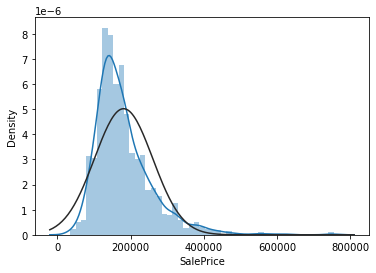

In [653]:
from scipy.stats import norm
sns.distplot(df['SalePrice'], fit=norm)
plt.show()

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [655]:
df['MSSubClass']=df['MSSubClass'].astype('object')

In [656]:
nums = df.select_dtypes(include = ['float64','int64'])
nums.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [657]:
df = df.drop('Id',axis=1)


In [658]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,Corner,...,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000


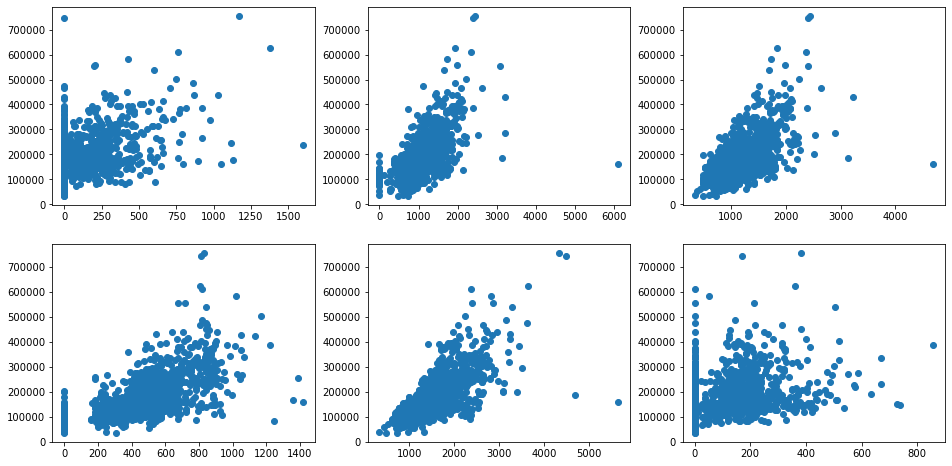

In [659]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

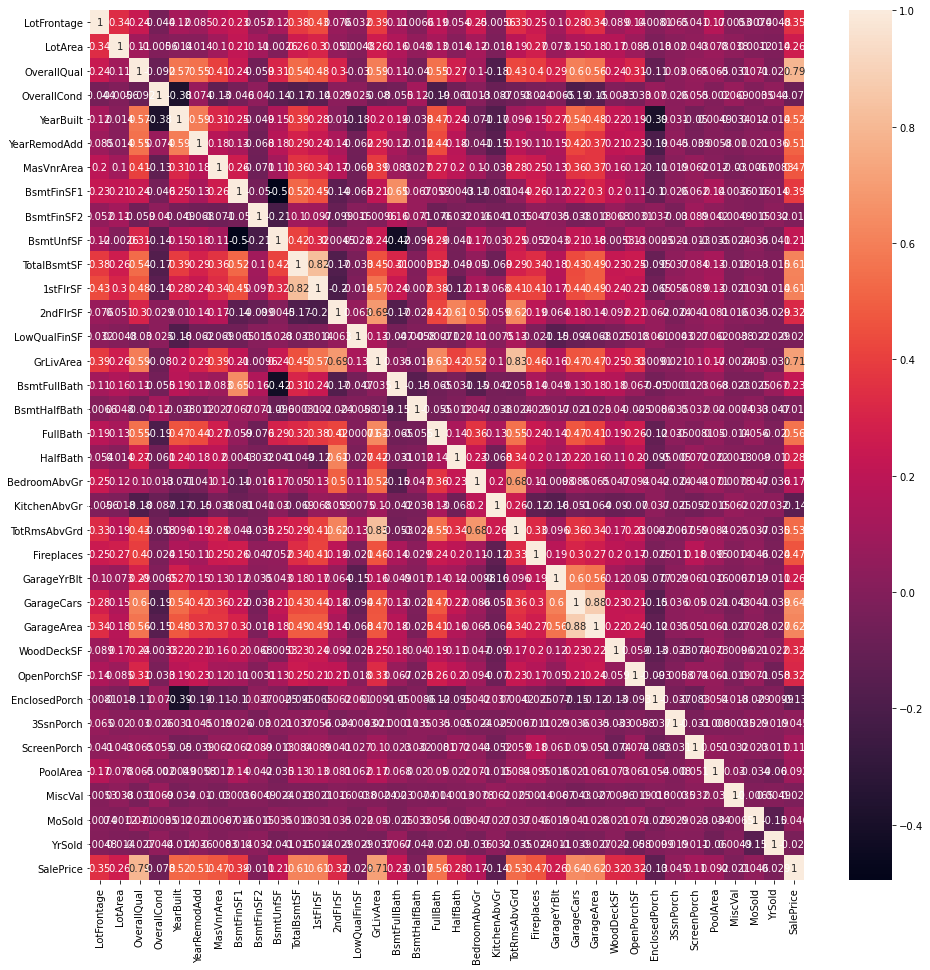

In [660]:
# Plotting heatmap to check correlations
plt.figure(figsize=(16,16))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
#sns.heatmap(df[nums].corr(), annot=True)
plt.show()

In [661]:
# Assigning labels to variables where there is order in Categories i.e. Ordinal features
df = df.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )


In [662]:
df[['BsmtCond','Alley','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir','ExterCond','ExterQual','Fence','FireplaceQu','Functional','GarageCond','GarageQual','GarageFinish','HeatingQC','KitchenQual','LandContour','LandSlope','LotShape','PavedDrive','PoolQC','Sreet','Utilities']] = df[['BsmtCond','Alley','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir','ExterCond','ExterQual','Fence','FireplaceQu','Functional','GarageCond','GarageQual','GarageFinish','HeatingQC','KitchenQual','LandContour','LandSlope','LotShape','PavedDrive','PoolQC','Street','Utilities']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [663]:
chars = df.select_dtypes(include = ['object'])
chars.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Data Preparation
(note to self: You didn't make any plots for EDA)

In [664]:
import datetime

In [665]:
#Changing months to categorical variables:
import calendar

df.MonthSold = df.MoSold.apply(lambda x: calendar.month_name[x])
df = df.drop(['MoSold'],axis=1)

In [666]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [667]:
#Variables which might make more sense than year

df['Age'] = df['YrSold'] - df['YearBuilt']
df['Remod_Age'] = df['YrSold'] - df['YearRemodAdd']
df['Garage_Age'] = df['YrSold'] - df['GarageYrBlt']
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [668]:
nums = list(df.select_dtypes(include=['float64','int64']))
nums

['LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'SalePrice',
 'Sreet',
 'Age',
 'Remod_Age',
 'Garage_Age']

In [669]:
def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [670]:
df = remove_outliers(df,nums)

In [671]:
df.shape

(1158, 79)

In [672]:
#converting binary variables to numeric by mapping to 0 and 1

df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
df['CentralAir'] = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [673]:
chars = df.select_dtypes(include=['object'])
chars.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,60,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
1,20,RL,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2,60,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
3,70,RL,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml
4,60,RL,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal


In [674]:
# One hot encoding
dumdums = pd.get_dummies(chars, drop_first=True)
dumdums.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [675]:
#dropping original categorical columns
df = df.drop(list(chars.columns), axis=1)

In [676]:
#concatenating dummy columns to original dataframe
df = pd.concat([df,dumdums], axis=1)

In [677]:
df.shape

(1158, 198)

In [678]:
#train_test_split
df_train,df_test=train_test_split(df,train_size=0.70, random_state=100)
df_train.shape

(810, 198)

In [679]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [680]:
nums_final=X_train.select_dtypes(include=['int64','float64']).columns

In [681]:
scaler = StandardScaler()
X_train[nums_final] = scaler.fit_transform(X_train[nums_final])
X_test[nums_final] = scaler.transform(X_test[nums_final])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

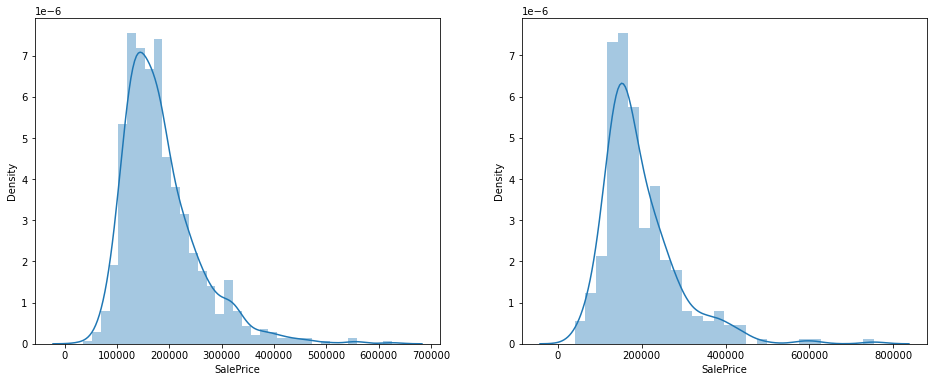

In [682]:
# Distribution of train and test data after scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

### Linear Regression Model

In [683]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['Condition2_Norm', 'Condition2_PosA', 'Condition2_RRNn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Stucco',
       'Heating_Grav', 'Heating_Wall'],
      dtype='object')

In [684]:
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     13.44
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.93e-38
Time:                        12:43:04   Log-Likelihood:                -206.62
No. Observations:                 810   AIC:                             455.2
Df Residuals:                     789   BIC:                             553.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.8730      0.200     59.417      0.000      11.481      12.265
Condition2_Norm        -0.3011      0.191     -1.577      0.115      -0.676       0.074
Condition2_PosA         0.5483      0.371      1.478      0.140      -0.180       1.276
Condition2_RRNn        -0.7636      0.296     -2.583      0.010      -1.344      -0.183
Exterior1st_BrkComm    -0.5698      0.334     -1.705      0.089      -1.226       0.086
Exterior1st_BrkFace     0.5367      0.126      4.253      0.000       0.289       0.784
Exterior1st_CemntBd    -0.2871      0.379     -0.757      0.449      -1.032       0.457
Exterior1st_HdBoard     0.4004      0.111      3.596      0.000       0.182       0.619
Exterior1st_ImStucc     0.9042      0.334      2.706      0.007       0.248       1.560
Exterior1st_MetalSd     0.3259      0.112      2.920      0.004       0.107       0.545
Exterior1st_Plywood     0.4500      0.116      3.888      0.000       0.223       0.677
Exterior1st_Stone       0.9953      0.334      2.978      0.003       0.339       1.651
Exterior1st_Stucco      0.4246      0.201      2.109      0.035       0.029       0.820
Exterior1st_VinylSd     0.6609      0.109      6.063      0.000       0.447       0.875
Exterior1st_Wd Sdng     0.2702      0.112      2.412      0.016       0.050       0.490
Exterior1st_WdShing     0.2741      0.137      1.995      0.046       0.004       0.544
Exterior2nd_CmentBd     0.8474      0.359      2.359      0.019       0.142       1.553
Exterior2nd_Other       0.4402      0.317      1.389      0.165      -0.182       1.062
Exterior2nd_Stucco     -0.2296      0.171     -1.343      0.180      -0.565       0.106
Heating_Grav           -0.3733      0.225     -1.661      0.097      -0.815       0.068
Heating_Wall           -0.3533      0.328     -1.078      0.281      -0.997       0.290
==============================================================================
Omnibus:                       29.565   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.499
Skew:                           0.310   Prob(JB):                     1.32e-10
Kurtosis:                       3.981   Cond. No.                         72.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [685]:
#RIDGE REGULARIZATION

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [686]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 9.0}
-0.0782408351272157


In [687]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011098,0.008805,0.003627,8.662080e-04,0.0001,{'alpha': 0.0001},-0.080232,-0.082664,-0.081135,-0.088180,...,-0.082079,0.003377,26,-0.056945,-0.053790,-0.051273,-0.055231,-0.052196,-0.053887,0.002042
1,0.006184,0.000399,0.003787,1.162951e-03,0.001,{'alpha': 0.001},-0.080068,-0.082624,-0.081112,-0.088187,...,-0.082035,0.003399,25,-0.056958,-0.053802,-0.051279,-0.055237,-0.052212,-0.053898,0.002043
2,0.006188,0.000975,0.003787,1.468940e-03,0.01,{'alpha': 0.01},-0.078941,-0.082237,-0.080899,-0.088254,...,-0.081699,0.003578,24,-0.057063,-0.053921,-0.051345,-0.055300,-0.052371,-0.054000,0.002039
3,0.006185,0.001465,0.003587,7.987620e-04,0.05,{'alpha': 0.05},-0.077032,-0.080907,-0.080142,-0.088553,...,-0.080964,0.004036,22,-0.057352,-0.054476,-0.051673,-0.055543,-0.052924,-0.054394,0.001982
4,0.005986,0.000629,0.002788,3.992403e-04,0.1,{'alpha': 0.1},-0.076125,-0.079984,-0.079480,-0.088856,...,-0.080599,0.004337,21,-0.057623,-0.055117,-0.052096,-0.055804,-0.053561,-0.054840,0.001893
5,0.006982,0.001261,0.003587,1.017318e-03,0.2,{'alpha': 0.2},-0.075937,-0.079073,-0.078721,-0.089165,...,-0.080404,0.004538,20,-0.058145,-0.056087,-0.052803,-0.056252,-0.054549,-0.055567,0.001792
6,0.006977,0.001661,0.002784,3.960913e-04,0.3,{'alpha': 0.3},-0.076052,-0.078490,-0.078345,-0.089288,...,-0.080288,0.004626,19,-0.058600,-0.056767,-0.053379,-0.056602,-0.055372,-0.056144,0.001725
7,0.006185,0.000977,0.002788,3.988287e-04,0.4,{'alpha': 0.4},-0.076138,-0.078365,-0.078114,-0.089345,...,-0.080225,0.004667,18,-0.059057,-0.057301,-0.053894,-0.056917,-0.056168,-0.056668,0.001680
8,0.006185,0.000976,0.002989,6.306766e-04,0.5,{'alpha': 0.5},-0.076281,-0.078431,-0.077996,-0.089391,...,-0.080209,0.004678,17,-0.059438,-0.057726,-0.054299,-0.057208,-0.056866,-0.057107,0.001660
9,0.006585,0.000797,0.003188,9.753488e-04,0.6,{'alpha': 0.6},-0.076430,-0.078510,-0.077917,-0.089416,...,-0.080196,0.004679,16,-0.059778,-0.058099,-0.054627,-0.057466,-0.057457,-0.057486,0.001662


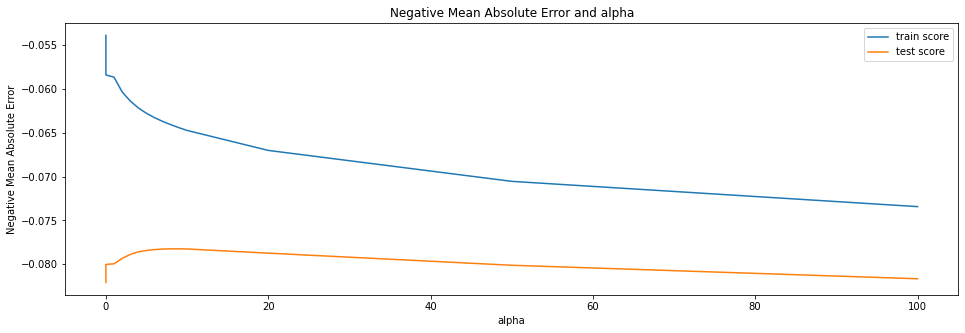

In [688]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [689]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01194701,  0.00992235,  0.        ,  0.00786429, -0.00588595,
        0.00053275,  0.        ,  0.        ,  0.06443688,  0.04118397,
        0.00829371,  0.00209334, -0.0104196 ,  0.00985105, -0.00292754,
        0.00858449,  0.01255367,  0.02184498, -0.00081836,  0.00602372,
       -0.0003521 ,  0.02515451,  0.01195115,  0.        ,  0.0285049 ,
        0.02164657,  0.        ,  0.04109115,  0.01174869,  0.00516104,
        0.01805269,  0.01560477,  0.00888424,  0.        ,  0.01092328,
        0.02475827,  0.01169376,  0.01584595,  0.00043873,  0.00638855,
        0.01426787,  0.02545143,  0.01543342, -0.00893224,  0.        ,
        0.01279128,  0.00874887,  0.00691404,  0.        ,  0.01476538,
        0.        ,  0.        , -0.00090477,  0.        ,  0.        ,
       -0.05550841, -0.01218971,  0.00805633, -0.02629878,  0.00413971,
       -0.00961135,  0.01684604,  0.00636711,  0.02462765,  0.00538248,
       -0.00344652,  0.01713059, -0.00956301, -0.00678617, -0.03

In [690]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9269797090627164


In [691]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9153249862856133


In [692]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.014244995022051435


In [693]:
def takeSecond(elem):
    return elem[1]

In [694]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters_1)), key=takeSecond, reverse = True)


[('constant', 11.886),
 ('Neighborhood_StoneBr', 0.096),
 ('Neighborhood_Crawfor', 0.072),
 ('Condition2_Norm', 0.066),
 ('OverallQual', 0.064),
 ('Exterior1st_BrkFace', 0.064),
 ('Neighborhood_NridgHt', 0.055),
 ('SaleCondition_Normal', 0.055),
 ('MSZoning_FV', 0.05),
 ('Condition1_Norm', 0.044),
 ('OverallCond', 0.041),
 ('GrLivArea', 0.041),
 ('SaleCondition_Partial', 0.039),
 ('Neighborhood_ClearCr', 0.037),
 ('Neighborhood_BrkSide', 0.035),
 ('Neighborhood_Veenker', 0.031),
 ('Exterior2nd_Wd Sdng', 0.031),
 ('1stFlrSF', 0.029),
 ('MSZoning_RL', 0.029),
 ('Exterior1st_MetalSd', 0.028),
 ('GarageType_Basment', 0.026),
 ('TotalBsmtSF', 0.025),
 ('TotRmsAbvGrd', 0.025),
 ('GarageArea', 0.025),
 ('MSSubClass_70', 0.025),
 ('LotConfig_CulDSac', 0.025),
 ('Neighborhood_NoRidge', 0.024),
 ('BsmtFinSF1', 0.022),
 ('2ndFlrSF', 0.022),
 ('Condition1_RRAn', 0.021),
 ('Exterior1st_Stucco', 0.021),
 ('Exterior1st_VinylSd', 0.021),
 ('SaleType_New', 0.021),
 ('Neighborhood_Somerst', 0.02),
 ('Co

In [695]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [696]:
# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [697]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.0782537519500139


In [698]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [699]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9219705805018504


In [700]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9198079444674259


In [701]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.013490820748169572


In [702]:
# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters_1)), key=takeSecond, reverse = True)

[('constant', 11.965),
 ('Neighborhood_StoneBr', 0.11),
 ('Neighborhood_Crawfor', 0.078),
 ('GrLivArea', 0.077),
 ('OverallQual', 0.073),
 ('Exterior1st_BrkFace', 0.06),
 ('SaleCondition_Partial', 0.057),
 ('MSZoning_FV', 0.054),
 ('Neighborhood_NridgHt', 0.053),
 ('SaleCondition_Normal', 0.048),
 ('OverallCond', 0.042),
 ('Condition1_Norm', 0.033),
 ('TotalBsmtSF', 0.03),
 ('Exterior1st_MetalSd', 0.029),
 ('MSZoning_RL', 0.028),
 ('BsmtFinSF1', 0.023),
 ('GarageArea', 0.023),
 ('Neighborhood_BrkSide', 0.022),
 ('TotRmsAbvGrd', 0.021),
 ('Exterior1st_VinylSd', 0.019),
 ('Fireplaces', 0.016),
 ('LotConfig_CulDSac', 0.016),
 ('LotFrontage', 0.015),
 ('HeatingQC', 0.015),
 ('ScreenPorch', 0.015),
 ('LotArea', 0.014),
 ('Neighborhood_Somerst', 0.014),
 ('Exterior2nd_Wd Sdng', 0.014),
 ('GarageCars', 0.013),
 ('BsmtFullBath', 0.012),
 ('KitchenQual', 0.011),
 ('Functional', 0.011),
 ('WoodDeckSF', 0.011),
 ('1stFlrSF', 0.01),
 ('FullBath', 0.01),
 ('GarageQual', 0.01),
 ('Alley', 0.009),
 (

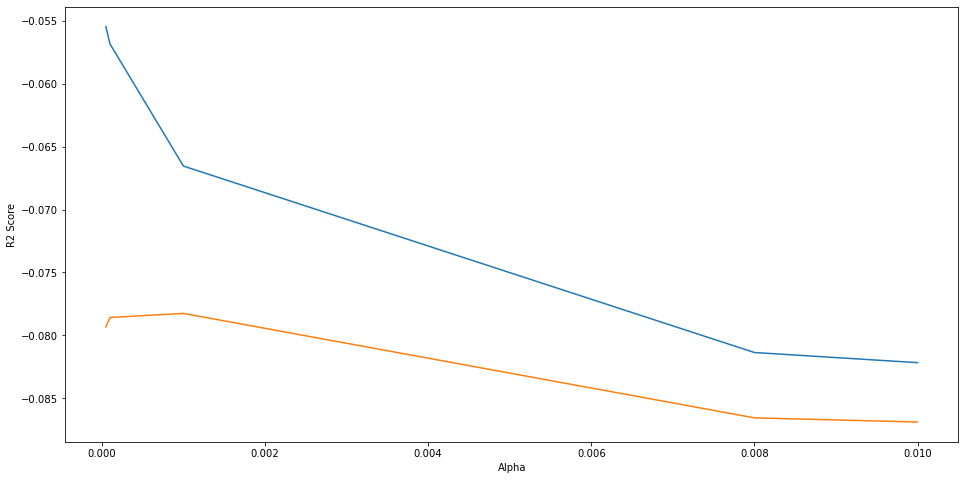

In [705]:

plt.figure(figsize=(16,8))
plt.plot(cv_results_l['param_alpha'],cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'],cv_results_l['mean_test_score'])
#plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()